In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

# Regression

In [29]:
df=np.loadtxt("C:\\Users\\nshra\\Machine learning\\Advanced learning algorithms\\Files\\data_w3_ex1.csv",delimiter=',')
df

array([[1651.  ,  432.65],
       [1691.82,  454.94],
       [1732.63,  471.53],
       [1773.45,  482.51],
       [1814.27,  468.36],
       [1855.08,  482.15],
       [1895.9 ,  540.02],
       [1936.71,  534.58],
       [1977.53,  558.35],
       [2018.35,  566.42],
       [2059.16,  581.4 ],
       [2099.98,  596.46],
       [2140.8 ,  596.71],
       [2181.61,  619.45],
       [2222.43,  616.58],
       [2263.24,  653.16],
       [2304.06,  666.52],
       [2344.88,  670.59],
       [2385.69,  669.02],
       [2426.51,  678.91],
       [2467.33,  707.44],
       [2508.14,  710.76],
       [2548.96,  745.19],
       [2589.78,  729.85],
       [2630.59,  743.8 ],
       [2671.41,  738.2 ],
       [2712.22,  772.95],
       [2753.04,  772.22],
       [2793.86,  784.21],
       [2834.67,  776.43],
       [2875.49,  804.78],
       [2916.31,  833.27],
       [2957.12,  825.69],
       [2997.94,  821.05],
       [3038.76,  833.82],
       [3079.57,  833.06],
       [3120.39,  825.7 ],
 

In [30]:
x=df[:,0]
print(x)
x=np.expand_dims(x,axis=1)
print(x)
print(x.shape)


[1651.   1691.82 1732.63 1773.45 1814.27 1855.08 1895.9  1936.71 1977.53
 2018.35 2059.16 2099.98 2140.8  2181.61 2222.43 2263.24 2304.06 2344.88
 2385.69 2426.51 2467.33 2508.14 2548.96 2589.78 2630.59 2671.41 2712.22
 2753.04 2793.86 2834.67 2875.49 2916.31 2957.12 2997.94 3038.76 3079.57
 3120.39 3161.2  3202.02 3242.84 3283.65 3324.47 3365.29 3406.1  3446.92
 3487.73 3528.55 3569.37 3610.18 3651.  ]
[[1651.  ]
 [1691.82]
 [1732.63]
 [1773.45]
 [1814.27]
 [1855.08]
 [1895.9 ]
 [1936.71]
 [1977.53]
 [2018.35]
 [2059.16]
 [2099.98]
 [2140.8 ]
 [2181.61]
 [2222.43]
 [2263.24]
 [2304.06]
 [2344.88]
 [2385.69]
 [2426.51]
 [2467.33]
 [2508.14]
 [2548.96]
 [2589.78]
 [2630.59]
 [2671.41]
 [2712.22]
 [2753.04]
 [2793.86]
 [2834.67]
 [2875.49]
 [2916.31]
 [2957.12]
 [2997.94]
 [3038.76]
 [3079.57]
 [3120.39]
 [3161.2 ]
 [3202.02]
 [3242.84]
 [3283.65]
 [3324.47]
 [3365.29]
 [3406.1 ]
 [3446.92]
 [3487.73]
 [3528.55]
 [3569.37]
 [3610.18]
 [3651.  ]]
(50, 1)


In [31]:
y=df[:,1]
print(y)
y=np.expand_dims(y,axis=1)
print(y)
print(y.shape)

[432.65 454.94 471.53 482.51 468.36 482.15 540.02 534.58 558.35 566.42
 581.4  596.46 596.71 619.45 616.58 653.16 666.52 670.59 669.02 678.91
 707.44 710.76 745.19 729.85 743.8  738.2  772.95 772.22 784.21 776.43
 804.78 833.27 825.69 821.05 833.82 833.06 825.7  843.58 869.4  851.5
 863.18 853.01 877.16 863.74 874.67 877.74 874.11 882.8  910.83 897.42]
[[432.65]
 [454.94]
 [471.53]
 [482.51]
 [468.36]
 [482.15]
 [540.02]
 [534.58]
 [558.35]
 [566.42]
 [581.4 ]
 [596.46]
 [596.71]
 [619.45]
 [616.58]
 [653.16]
 [666.52]
 [670.59]
 [669.02]
 [678.91]
 [707.44]
 [710.76]
 [745.19]
 [729.85]
 [743.8 ]
 [738.2 ]
 [772.95]
 [772.22]
 [784.21]
 [776.43]
 [804.78]
 [833.27]
 [825.69]
 [821.05]
 [833.82]
 [833.06]
 [825.7 ]
 [843.58]
 [869.4 ]
 [851.5 ]
 [863.18]
 [853.01]
 [877.16]
 [863.74]
 [874.67]
 [877.74]
 [874.11]
 [882.8 ]
 [910.83]
 [897.42]]
(50, 1)


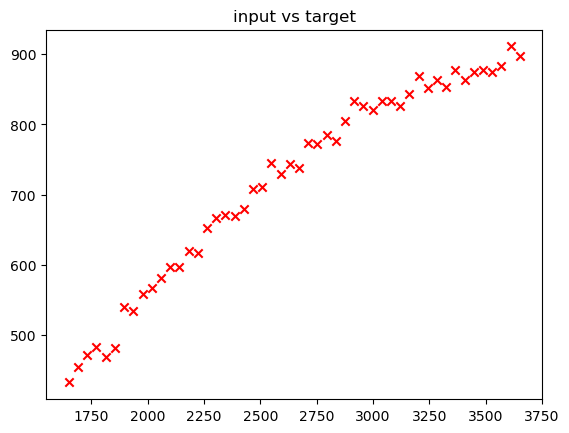

In [38]:
%matplotlib inLine
plt.scatter(x,y,marker='x',c='r')
plt.title("input vs target")
plt.show()

# Split the dataset into training, cross validation and testsets

In [41]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=1)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.50,random_state=1)
del x_,y_
print(x_train.shape,y_train.shape,x_cv.shape,y_cv.shape,x_test.shape,y_test.shape)

(30, 1) (30, 1) (10, 1) (10, 1) (10, 1) (10, 1)


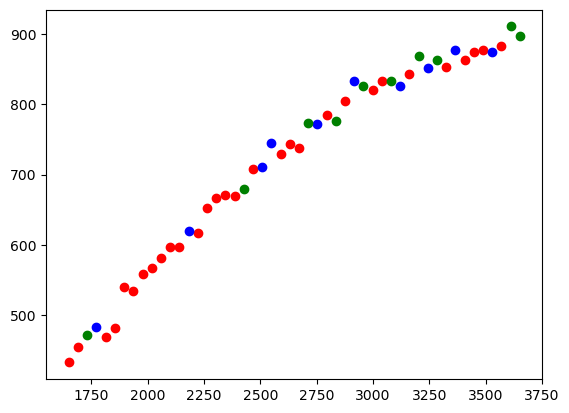

In [49]:
plt.scatter(x_train,y_train,c='r')
plt.scatter(x_cv,y_cv,c='b')
plt.scatter(x_test,y_test,c='g')

## Linear  model
 Feature scaling to standardize the features on given range

2504.061224489796
574.8536806268388


Text(0.5, 1.0, 'scaled input vs. target')

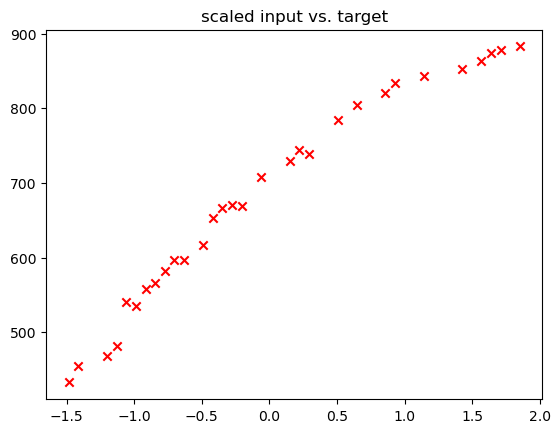

In [69]:
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(scaler_linear.mean_.squeeze())
print( scaler_linear.scale_.squeeze())

# Plot the results
plt.scatter(x=X_train_scaled, y=y_train,marker='x',c='r')
plt.title("scaled input vs. target")

Train the model

In [70]:
linear_model=LinearRegression()
linear_model.fit(X_train_scaled,y_train)

LinearRegression()

Evaluate the model
we caluclate loss fucntion i.e mean square root error

In [73]:
yhat = linear_model.predict(X_train_scaled)
print(f"using sklearn:{mean_squared_error(y_train,yhat)/2}")
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")


using sklearn:406.19374192533127
training MSE (for-loop implementation): 406.19374192533127


calculating mse to crossvlidation set too

In [74]:
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216



Adding Polynomial Features

In [76]:
print(x_train)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[3324.47]
 [2344.88]
 [3487.73]
 [2630.59]
 [2589.78]
 [1814.27]
 [2997.94]
 [2222.43]
 [2875.49]
 [2059.16]
 [2793.86]
 [3446.92]
 [3038.76]
 [2385.69]
 [2467.33]
 [2671.41]
 [1895.9 ]
 [1936.71]
 [3569.37]
 [1691.82]
 [2304.06]
 [1651.  ]
 [2263.24]
 [1855.08]
 [2099.98]
 [2018.35]
 [1977.53]
 [2140.8 ]
 [3406.1 ]
 [3161.2 ]]
[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


claculating mean and standard devation for loss functon or mse

In [79]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


In [81]:
model=LinearRegression()
model.fit(X_train_mapped_scaled,y_train)
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

Training MSE: 49.111609334025154


In [84]:
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 87.69841211111911


polynomial features

In [87]:
model=LinearRegression()
model.fit(X_train_mapped_scaled,y_train)
#mse
yhat=model.predict(X_train_mapped_scaled)
print("training mse",mean_squared_error(y_train,yhat)//2)
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

training mse 49.0
Cross validation MSE: 87.69841211111911


Text(0.5, 1.0, 'degree of polynomial vs. train and CV MSEs')

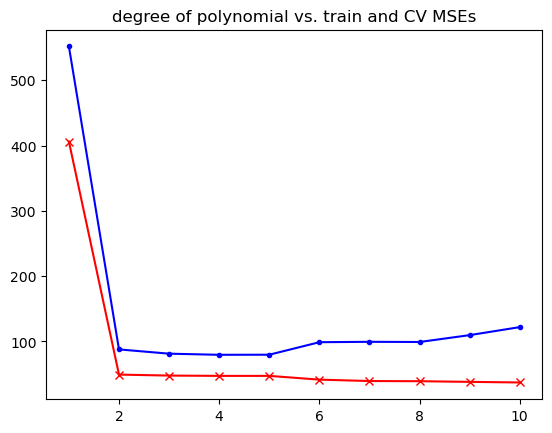

In [97]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
plt.plot(degrees, train_mses,marker='x',c='r')
plt.plot(degrees, cv_mses,marker='.',c='b')
plt.title("degree of polynomial vs. train and CV MSEs")

#  choosing the best model

In [98]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


In [99]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63


In [100]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [101]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

here custom modeles are checked

In [102]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []



# Loop over the the models
for model in nn_models:
    
    # Setup the loss and optimizer
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")
    
    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    
    print("Done!\n")

    
    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

NameError: name 'utils' is not defined

# Classification


OSError: ./data/data_w3_ex2.csv not found.